<a href="https://colab.research.google.com/github/Klim2007/wall_mart_sales_kaggle/blob/main/WallMart29_03_CPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICTION OF SALES BY STORES, CPI & FUEL PRICE 
(USING XGBOOST XGREGRESSOR)

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from xgboost import XGBRegressor
import plotly.express as px
import plotly.graph_objects as go
import datetime
import seaborn as sns

DATA PREPROCESSING

In [64]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/walmart-sales-dataset-of-45stores.csv',parse_dates=['Date'])

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1063: UserWarning:

Parsing '16-04-2010' in DD/MM/YYYY format. Provide format or speci

In [65]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [66]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [67]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [68]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [69]:
df.value_counts()

Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      2010-01-10  1453329.50    0             71.89        2.603       211.671989  7.838           1
30     2012-10-19  437537.29     0             68.52        3.594       223.059808  6.170           1
31     2010-03-12  1338716.37    0             50.43        2.708       211.265543  8.163           1
       2010-03-09  1302047.48    0             82.57        2.577       211.188693  8.099           1
       2010-02-26  1344354.41    0             45.31        2.561       210.975957  8.324           1
                                                                                                   ..
15     2012-10-26  558473.60     0             55.75        4.071       138.728161  7.992           1
       2012-10-19  555652.77     0             52.89        4.153       138.833613  7.992           1
       2012-10-08  590453.63     0             73.99        3.863       138.143774  8.1

Analyzing data and dependancies
1. Store Sales Hollidays vs Working days

In [70]:
store_sales_working = df[df['Holiday_Flag'].isin([0])]
sales_stores = store_sales_working.groupby('Store').Weekly_Sales.mean().reset_index()
fig = px.bar(sales_stores, x = "Store", y ="Weekly_Sales",color="Store",title="Store weekly Sales",height=400)
fig.show()

2.Hollyday_Sales

In [71]:
store_sales_hollidays = df[df['Holiday_Flag'].isin([1])]
a = store_sales_hollidays.groupby(by="Store", dropna=False).mean().reset_index()
fig = px.bar(a, x='Store', y='Weekly_Sales',color='Store',title="Stores Overall Sales")
fig.show()  

employment working days vs hollydays

In [72]:
store_emp_hollidays = df[df['Holiday_Flag'].isin([1])]
store_emp_wrk = df[df['Holiday_Flag'].isin([0])]

store_emp_hollidays['mounth'] = store_emp_hollidays['Date'].dt.month
store_emp_wrk['mounth'] = store_emp_wrk['Date'].dt.month

<ipython-input-72-097336b97de2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-097336b97de2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
store_emp_hollidays = store_emp_hollidays.groupby('mounth')['Unemployment'].mean()
store_emp_wrk = store_emp_wrk.groupby('mounth')['Unemployment'].mean()

In [74]:
new_index = []
for i in range (1,13): new_index.append(i)
store_emp_hol = store_emp_hollidays.reindex(new_index)

In [75]:
store_emp_hol

mounth
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7     7.237333
8          NaN
9     8.097489
10    7.968456
11    8.190237
12    8.299607
Name: Unemployment, dtype: float64

In [76]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y= store_emp_hol,
    name='unemployment on holidays',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y= store_emp_wrk,
    name='unemployment on working days',
    marker_color='lightsalmon'
))

We see that unemployment on holidays is much higher 

CPI index review

In [77]:
CPI_stores = df.groupby('Store').CPI.mean().reset_index()
fig = px.bar(CPI_stores, x='Store', y='CPI',color='Store',title="CPI by Stores")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'category ascending'})
fig.show()

In [78]:
CPI_hollidays = df[df['Holiday_Flag'].isin([1])]
CPI_wrk = df[df['Holiday_Flag'].isin([0])]

CPI_hollidays['mounth'] = CPI_hollidays['Date'].dt.month
CPI_wrk['mounth'] = CPI_wrk['Date'].dt.month

<ipython-input-78-a9381e709855>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-a9381e709855>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [79]:
CPI_hollidays.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'mounth'],
      dtype='object')

In [80]:
CPI_on_hollidays = CPI_hollidays.groupby('mounth')['CPI'].mean()
CPI_on_wrk = CPI_wrk.groupby('mounth')['CPI'].mean()

In [81]:
new_index = []
for i in range (1,13): new_index.append(i)
CPI_on_hollidays = CPI_on_hollidays.reindex(new_index)

In [82]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=months,
    y= CPI_on_hollidays,
    name='CPI on holidays',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=months,
    y= CPI_on_wrk,
    name='CPI on working days',
    marker_color='lightsalmon'
))

In [83]:
df['Year'] = df['Date'].dt.strftime('%Y')
df['Mounth'] = df['Date'].dt.strftime('%m')
df['Day'] = df['Date'].dt.strftime('%d')

In [84]:
df.head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Mounth,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,05,02
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,02
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,26
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,05,03
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,03
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,03,19
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,03,26
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2010,02,04
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,2010,09,04


In [85]:
df_copi = df.loc[df['Year'] == '2010']
stores=df_copi.groupby('Store').agg({'Weekly_Sales' : 'sum'})
stores = stores.reset_index()

In [86]:
stores.head()

,Store,Weekly_Sales
0,1,73278832.00
1,2,95277864.19
2,3,18745419.00
3,4,95680470.81
4,5,14836030.77


In [87]:
str_nbr = []
for i in range(1,50):str_nbr.append(i)
fig = go.Figure()
fig.add_trace(go.Bar(
    x=str_nbr,
    y= stores['Weekly_Sales'],
    name='Weekly_Sales',
    marker_color='indianred'
))

<Axes: xlabel='Year', ylabel='Fuel_Price'>

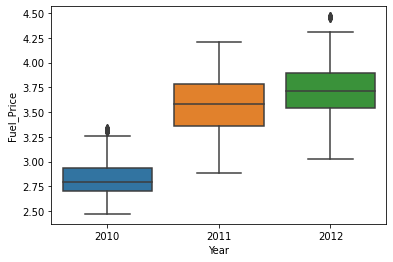

In [88]:
sns.boxplot(x='Year', y='Fuel_Price', data=df)


<Axes: xlabel='Year', ylabel='Unemployment'>

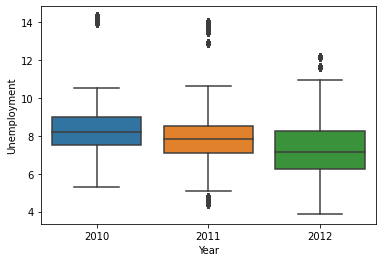

In [89]:
sns.boxplot(x='Year', y='Unemployment', data=df)

<Axes: xlabel='Year', ylabel='CPI'>

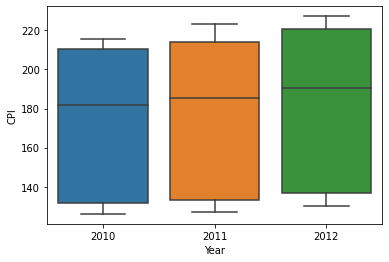

In [90]:
sns.boxplot(x='Year', y='CPI', data=df)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: UserWarning:



`distplot` is a deprec

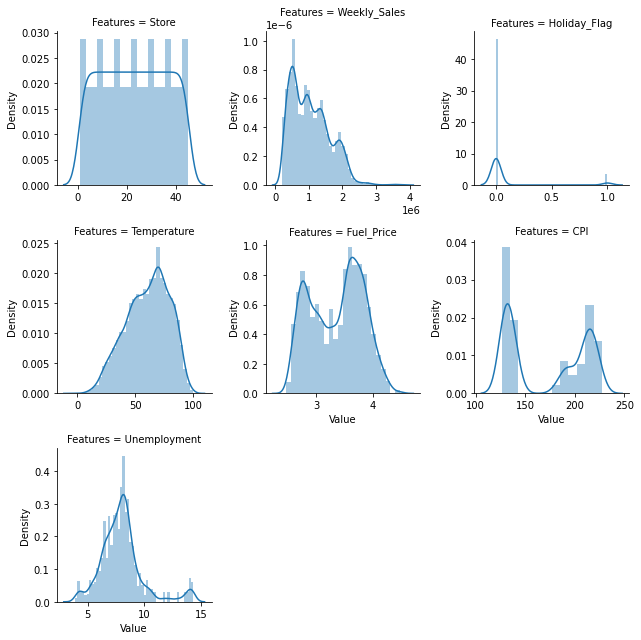

In [91]:
numeric_features = df.drop(df.columns[[1,8,9,10]],axis = 1)

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

In [92]:
numeric_features

,level_0,Features,Value
0,0,Store,1.000000e+00
1,0,Weekly_Sales,1.643691e+06
2,0,Holiday_Flag,0.000000e+00
3,0,Temperature,4.231000e+01
4,0,Fuel_Price,2.572000e+00
...,...,...,...
45040,6434,Holiday_Flag,0.000000e+00
45041,6434,Temperature,5.885000e+01
45042,6434,Fuel_Price,3.882000e+00
45043,6434,CPI,1.923089e+02


In [93]:
df=df.drop(['Date','Day','Year'],axis=1)

In [94]:
# adding 3 more features
mean_month_fuel_price = df.groupby('Mounth')['Fuel_Price'].median().to_dict()
df['mean_month_fuel_price'] = df['Mounth'].map(mean_month_fuel_price)
mean_month_CPI = df.groupby('Mounth')['CPI'].median().to_dict()
df['mean_month_CPI'] = df['Mounth'].map(mean_month_CPI)
mean_month_CPI = df.groupby('Mounth')['CPI'].median().to_dict()
df['mean_month_CPI'] = df['Mounth'].map(mean_month_CPI)

In [95]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Mounth,mean_month_fuel_price,mean_month_CPI
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,3.595,182.046418
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,3.130,182.517732
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,02,3.172,182.077469
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,02,3.172,182.077469
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,05,3.595,182.046418
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,09,3.554,182.669674
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,05,3.595,182.046418
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,3.130,182.517732
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,3.409,182.855869


In [96]:
df['Store'].astype('float64')
df['Mounth'].astype('float64')

0        5.0
1       12.0
2        2.0
3        2.0
4        5.0
        ... 
6430     9.0
6431     5.0
6432    12.0
6433    10.0
6434    10.0
Name: Mounth, Length: 6435, dtype: float64

In [97]:
X = df.drop('Weekly_Sales', axis=1)
y = df['Weekly_Sales']

In [133]:
X['Store'].astype('object')
X['Mounth'].astype('int64')
X['Holiday_Flag'] = X['Holiday_Flag'].astype('object')

In [134]:
X.dtypes

Store                      int64
Holiday_Flag              object
Temperature              float64
Fuel_Price               float64
CPI                      float64
Unemployment             float64
Mounth                    object
mean_month_fuel_price    float64
mean_month_CPI           float64
dtype: object

In [101]:
numeric =list(X.dtypes[X.dtypes == float].index)
categoric = list(X.dtypes[X.dtypes == object].index)

In [102]:
categoric


['Holiday_Flag', 'Mounth']

# Modeling

# Weekly/Yearly sales prediction by stores

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)

Numeric and Categoric features standartization 

Normalizing  features via logarithm 

In [104]:
for i in X_train[numeric]:
    X_train[i] = np.log(X_train[i]+1)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in log



In [105]:
for i in X_test[numeric]:
    X_test[i] = np.log(X_test[i]+1)

In [106]:
X_train[categoric].dtypes, X_train[numeric].dtypes 

(Holiday_Flag    object
 Mounth          object
 dtype: object, Temperature              float64
 Fuel_Price               float64
 CPI                      float64
 Unemployment             float64
 mean_month_fuel_price    float64
 mean_month_CPI           float64
 dtype: object)

In [107]:
X_train = pd.get_dummies(X_train, columns=categoric)

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [108]:
X_test = pd.get_dummies(X_test, columns=categoric)

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [109]:
X_train.columns, X_test.columns

(Index(['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
        'mean_month_fuel_price', 'mean_month_CPI', 'Holiday_Flag_0',
        'Holiday_Flag_1', 'Mounth_01', 'Mounth_02', 'Mounth_03', 'Mounth_04',
        'Mounth_05', 'Mounth_06', 'Mounth_07', 'Mounth_08', 'Mounth_09',
        'Mounth_10', 'Mounth_11', 'Mounth_12'],
       dtype='object'),
 Index(['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
        'mean_month_fuel_price', 'mean_month_CPI', 'Holiday_Flag_0',
        'Holiday_Flag_1', 'Mounth_01', 'Mounth_02', 'Mounth_03', 'Mounth_04',
        'Mounth_05', 'Mounth_06', 'Mounth_07', 'Mounth_08', 'Mounth_09',
        'Mounth_10', 'Mounth_11', 'Mounth_12'],
       dtype='object'))

In [110]:
import xgboost as xgb
XG = xgb.XGBRegressor(objective = 'reg:squarederror' , learning_rate = 0.1,max_depth = 10, n_estimators = 100).fit(X_train, y_train)

In [111]:
XG.score(X_train,y_train) #0.9924816576910022

0.9975995144236224

In [112]:
y_pred_XG = XG.predict(X_test)

In [113]:
print (y_pred_XG)

[1361341.8   731372.8   549375.2  ...  422028.84 1641423.1  1037605.44]


In [114]:
print('Training Accuracy :',XG.score(X_train,y_train))
print('Testing Accuracy :',XG.score(X_test,y_test))

Training Accuracy : 0.9975995144236224
Testing Accuracy : 0.9629309918889928


In [115]:
y_test.reset_index(drop=True)

0       1417616.81
1        784639.12
2        545120.67
3       1837457.69
4       1106176.83
           ...    
1604    1017593.47
1605     465279.68
1606     433744.83
1607    1401113.42
1608    1002806.39
Name: Weekly_Sales, Length: 1609, dtype: float64

In [116]:
#fig = px.scatter(compare, x="Weekly_Sales", y="pred",color="Weekly_Sales",trendline="ols") #color='pred'
#fig.show()

In [117]:
x_pred_XG = XG.predict(X_train)
X_train['predicted_sales_next_3years'] =x_pred_XG

In [118]:
X_train['predicted_yearly_sales']= X_train['predicted_sales_next_3years'].apply(lambda x: (x/3)) # wemade prediction based on 3 year sales history hence its divided by 3 (for year expression ) 

In [119]:
X_train

,Store,Temperature,Fuel_Price,CPI,Unemployment,mean_month_fuel_price,mean_month_CPI,Holiday_Flag_0,Holiday_Flag_1,Mounth_01,...,Mounth_05,Mounth_06,Mounth_07,Mounth_08,Mounth_09,Mounth_10,Mounth_11,Mounth_12,predicted_sales_next_3years,predicted_yearly_sales
1826,13,3.979682,1.510501,4.881484,1.960658,1.501407,5.212955,1,0,0,...,0,0,0,0,0,0,0,0,2.007569e+06,669189.625000
789,6,4.492673,1.499623,5.383669,2.070022,1.516006,5.213268,1,0,0,...,0,0,0,1,0,0,0,0,1.626411e+06,542137.125000
357,3,4.476882,1.534068,5.390692,2.148734,1.521044,5.220907,1,0,0,...,0,1,0,0,0,0,0,0,4.106767e+05,136892.218750
2708,19,4.288403,1.614624,4.937184,2.218442,1.516006,5.213268,1,0,0,...,0,0,0,1,0,0,0,0,1.479783e+06,493260.875000
1590,12,4.411464,1.371434,4.845258,2.714629,1.539659,5.210791,1,0,0,...,0,0,0,0,0,0,0,0,1.059514e+06,353171.458333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,32,3.961004,1.500961,5.288498,2.225272,1.501407,5.212955,1,0,0,...,0,0,0,0,0,0,0,0,1.144168e+06,381389.500000
2783,20,4.147253,1.622552,5.346917,2.114688,1.524969,5.209740,1,0,0,...,1,0,0,0,0,0,0,0,2.025886e+06,675295.291667
5932,42,4.417273,1.587806,4.867912,2.250660,1.501407,5.212955,1,0,0,...,0,0,0,0,0,0,0,0,5.495009e+05,183166.979167
3289,24,3.154017,1.374728,4.886793,2.232806,1.524969,5.209740,1,0,0,...,1,0,0,0,0,0,0,0,1.387122e+06,462373.833333


In [120]:
stores_y = X_train.groupby('Store').agg({'predicted_yearly_sales' : 'sum'})
stores_y = stores_y.reset_index() #позволяет аггрегированные денные не принимать как индекс и записывать сразу в колонку

In [121]:
#result
print(stores_y.head(45).astype(int))

    Store  predicted_yearly_sales
0       1                57988628
1       2                66304647
2       3                14335791
3       4                69782142
4       5                12736888
5       6                56039697
6       7                20132951
7       8                30995521
8       9                20181066
9      10                71030955
10     11                49112652
11     12                33121892
12     13                73165727
13     14                75675308
14     15                21585476
15     16                18715158
16     17                29256481
17     18                41066344
18     19                51659519
19     20                68143105
20     21                27785384
21     22                38600444
22     23                49756083
23     24                45282587
24     25                27298123
25     26                37573497
26     27                60898217
27     28                46230279
28     29     

In [122]:
# check mse metric
#from sklearn.metrics import mean_squared_error 
#mse = mean_squared_error(y_test,pred)
#residuals = y_test - pred
#plt.scatter(y_test,residuals)

NameError: ignored

# CPI prediction by Stores

In [126]:
X_cpi = df.drop('CPI', axis=1)
y_cpi = df['CPI']

In [129]:
X_cpi.dtypes

Store                      int64
Weekly_Sales             float64
Holiday_Flag               int64
Temperature              float64
Fuel_Price               float64
Unemployment             float64
Mounth                    object
mean_month_fuel_price    float64
mean_month_CPI           float64
dtype: object

In [131]:
numeric =list(X_cpi.dtypes[X_cpi.dtypes == float].index)
categoric = list(X_cpi.dtypes[X_cpi.dtypes == object].index)

In [138]:
X_cpi['Store'].astype('float')
X_cpi['Mounth'].astype('int64')
X_cpi['Holiday_Flag'] = X_cpi['Holiday_Flag'].astype('object')

In [139]:
X_cpi.dtypes #store is int resolve

Store                      int64
Weekly_Sales             float64
Holiday_Flag              object
Temperature              float64
Fuel_Price               float64
Unemployment             float64
Mounth                    object
mean_month_fuel_price    float64
mean_month_CPI           float64
dtype: object